In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import requests

In [ ]:
# Load the CSV data
file_path = '/content/sample_data/gas_data.csv'  # Update this with your file path
gas_fee_data = pd.read_csv(file_path)

# Convert the timestamp column to datetime
gas_fee_data['timestamp'] = pd.to_datetime(gas_fee_data['timestamp'])

# Extract day of the week and time of day features
gas_fee_data['day_of_week'] = gas_fee_data['timestamp'].dt.dayofweek
gas_fee_data['hour'] = gas_fee_data['timestamp'].dt.hour

# Drop the 'trading_volume' column as requested
gas_fee_data.drop(columns=['trading_volume'], inplace=True)

# Set the 'timestamp' as the index
gas_fee_data.set_index('timestamp', inplace=True)

# Prepare the features and labels
features = gas_fee_data[['day_of_week', 'hour', 'gas_fee']]
labels = gas_fee_data['gas_fee']

# Scale the features for LSTM model using MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Define the input sequence length (e.g., using the past 24 hours to predict the next hour)
sequence_length = 24

# Create sequences of data for LSTM
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i + sequence_length])
    y.append(features_scaled[i + sequence_length, 2])  # gas_fee is the 3rd column

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0489 - val_loss: 0.0011
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - val_loss: 8.2314e-04
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.6175e-04 - val_loss: 7.0070e-04
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9265e-04 - val_loss: 5.9578e-04
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.0577e-04 - val_loss: 6.0503e-04
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2234e-04 - val_loss: 4.9924e-04
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7028e-04 - val_loss: 4.0464e-04
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5297e-04 - val_loss: 3.5719e-04
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5496e-04 - val_loss: 3.2131e-04
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8763e-04 - val_loss: 3.4548e-04
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9599e-04

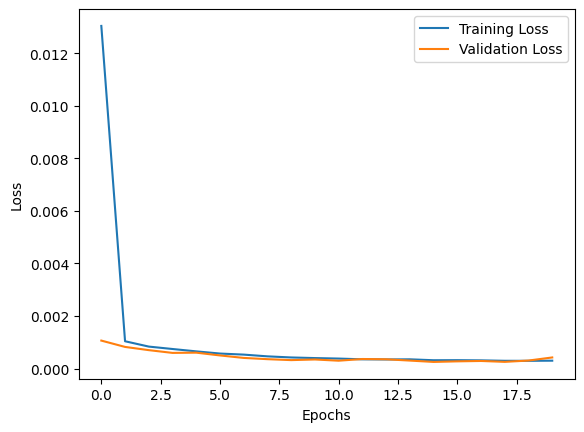

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Mean Absolute Error (MAE): 0.016093124986541748
Mean Squared Error (MSE): 0.00042227212665276674
Root Mean Squared Error (RMSE): 0.020549260975829927


In [ ]:
# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save('gas_fee_lstm_model.h5')

# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0550 - val_loss: 0.0012
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0055 - val_loss: 0.0011
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0035 - val_loss: 8.1323e-04
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0032 - val_loss: 7.8130e-04
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0027 - val_loss: 9.3479e-04
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0022 - val_loss: 6.8472e-04
Epoch 10/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0020 - val_loss: 6.5164e-04
Epoch 11/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0018 - val_loss: 7.7044e-04
Epoch 12/50
300/300 ━━━━━━━━━━━━━━━━━

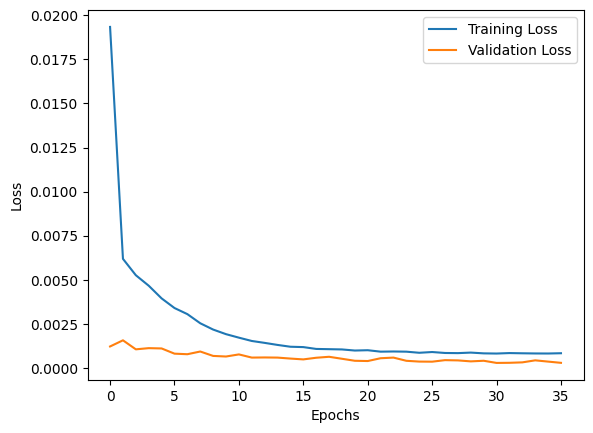

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Mean Absolute Error (MAE): 0.007734069655635811
Mean Squared Error (MSE): 0.0002880479892775616
Root Mean Squared Error (RMSE): 0.016971976587232308


In [ ]:
# Build the LSTM model
modela = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # UPDATED: Increased LSTM units and added return_sequences
    tf.keras.layers.Dropout(0.2),  # NEW: Added Dropout layer to prevent overfitting
    tf.keras.layers.LSTM(50, activation='relu'),  # NEW: Added second LSTM layer
    tf.keras.layers.Dropout(0.2),  # NEW: Added Dropout layer to prevent overfitting
    tf.keras.layers.Dense(1)
])

# Compile the model
modela.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')  # UPDATED: Explicitly set learning rate

# Train the model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # NEW: Added early stopping to prevent overfitting
history = modela.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])  # UPDATED: Increased epochs and added early stopping

# Save the model
modela.save('gas_fee_lstm_modela.h5')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
y_pred = modela.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
def real_time_testing():
    URL = 'https://api.etherscan.io/api?module=gastracker&action=gasoracle&apikey=PN5M93ND4RZB23TBG1IMRWKVAUT4U3STD4'  # Update with your Etherscan API key
    response = requests.get(URL)
    if response.status_code == 200:
        gas_data = response.json()
        if gas_data['status'] == '1':
            real_gas_fee = float(gas_data['result']['ProposeGasPrice'])
            # Prepare the latest data for prediction
            latest_data = features_scaled[-sequence_length:]
            latest_data = np.expand_dims(latest_data, axis=0)
            forecasted_fee_scaled = modela.predict(latest_data)
            forecasted_fee = scaler.inverse_transform([[0, 0, forecasted_fee_scaled[0][0]]])[0][2]
            print(f"Real-time Gas Fee: {real_gas_fee}")
            print(f"Forecasted Gas Fee: {forecasted_fee}")
            # Calculate error
            error = abs(real_gas_fee - forecasted_fee)
            print(f"Prediction Error: {error}")
        else:
            print("Failed to fetch real-time gas fee from Etherscan API.")
    else:
        print("Failed to fetch data from Etherscan API.")

# Run real-time testing
real_time_testing()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Real-time Gas Fee: 29.347393147
Forecasted Gas Fee: 31.421859329035964
Prediction Error: 2.074466182035966


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0618 - val_loss: 0.0023
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0080 - val_loss: 0.0023
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0059 - val_loss: 0.0015
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 10/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 11/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 12/100
300/300 ━━━━━━━━━━━━━━━━━━━━

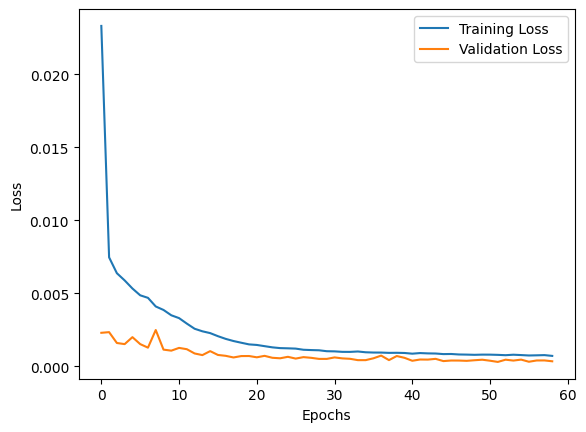

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Mean Absolute Error (MAE): 0.008726207431500684
Mean Squared Error (MSE): 0.0002966887987726693
Root Mean Squared Error (RMSE): 0.017224656709864186


In [ ]:
# Build the LSTM model
modelb = tf.keras.Sequential([
    tf.keras.layers.LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # UPDATED: Increased LSTM units to capture more complexity
    tf.keras.layers.Dropout(0.3),  # UPDATED: Increased Dropout rate to prevent overfitting
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),  # UPDATED: Added a third LSTM layer for deeper learning
    tf.keras.layers.Dropout(0.3),  # UPDATED: Added additional Dropout layer
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # UPDATED: Kept Dropout layer for regularization
    tf.keras.layers.Dense(1)
])

# Compile the model
modelb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')  # UPDATED: Reduced learning rate for finer updates

# Train the model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # UPDATED: Increased patience for better model tuning
history = modelb.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])  # UPDATED: Increased epochs for more training time

# Save the model
modelb.save('gas_fee_lstm_modelb.h5')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
y_pred = modelb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
def real_time_testing():
    URL = 'https://api.etherscan.io/api?module=gastracker&action=gasoracle&apikey=PN5M93ND4RZB23TBG1IMRWKVAUT4U3STD4'  # Update with your Etherscan API key
    response = requests.get(URL)
    if response.status_code == 200:
        gas_data = response.json()
        if gas_data['status'] == '1':
            real_gas_fee = float(gas_data['result']['ProposeGasPrice'])
            # Prepare the latest data for prediction
            latest_data = features_scaled[-sequence_length:]
            latest_data = np.expand_dims(latest_data, axis=0)
            forecasted_fee_scaled = modelb.predict(latest_data)
            forecasted_fee = scaler.inverse_transform([[0, 0, forecasted_fee_scaled[0][0]]])[0][2]
            print(f"Real-time Gas Fee: {real_gas_fee}")
            print(f"Forecasted Gas Fee: {forecasted_fee}")
            # Calculate error
            error = abs(real_gas_fee - forecasted_fee)
            print(f"Prediction Error: {error}")
        else:
            print("Failed to fetch real-time gas fee from Etherscan API.")
    else:
        print("Failed to fetch data from Etherscan API.")

# Run real-time testing
real_time_testing()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Real-time Gas Fee: 27.374726135
Forecasted Gas Fee: 31.17929490929067
Prediction Error: 3.804568774290672


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0669 - val_loss: 0.0043
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0078 - val_loss: 0.0026
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0068 - val_loss: 0.0016
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 10/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 11/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0031 - val_loss: 8.9100e-04
Epoch 12/100
300/300 ━━━━━━━━━━━━━━━━

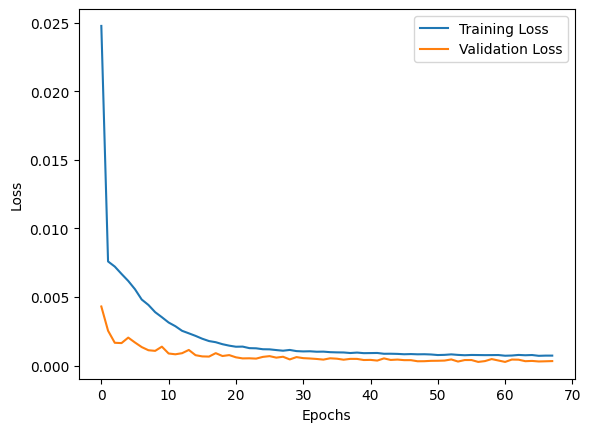

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Mean Absolute Error (MAE): 0.00900770014483426
Mean Squared Error (MSE): 0.0002770162523969313
Root Mean Squared Error (RMSE): 0.016643805225877023


In [ ]:
# Build the LSTM model
modelc = tf.keras.Sequential([
    tf.keras.layers.LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # UPDATED: Increased LSTM units to capture more complexity
    tf.keras.layers.Dropout(0.3),  # UPDATED: Increased Dropout rate to prevent overfitting
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),  # UPDATED: Added a third LSTM layer for deeper learning
    tf.keras.layers.Dropout(0.3),  # UPDATED: Added additional Dropout layer
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # UPDATED: Kept Dropout layer for regularization
    tf.keras.layers.Dense(1)
])

# Compile the model
modelc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')  # UPDATED: Reduced learning rate for finer updates

# Train the model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # UPDATED: Increased patience for better model tuning
history = modelc.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])  # UPDATED: Increased epochs for more training time

# Save the model
modelc.save('gas_fee_lstm_modelc.h5')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model performance
y_pred = modelc.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# Real-time testing using the Etherscan API
def real_time_testing():
    URL = 'https://api.etherscan.io/api?module=gastracker&action=gasoracle&apikey=PN5M93ND4RZB23TBG1IMRWKVAUT4U3STD4'  # Update with your Etherscan API key
    response = requests.get(URL)
    if response.status_code == 200:
        gas_data = response.json()
        if gas_data['status'] == '1':
            real_gas_fee = float(gas_data['result']['ProposeGasPrice'])
            # Prepare the latest data for prediction
            latest_data = features_scaled[-sequence_length:]
            latest_data = np.expand_dims(latest_data, axis=0)
            forecasted_fee_scaled = modelc.predict(latest_data)
            forecasted_fee = scaler.inverse_transform([[0, 0, forecasted_fee_scaled[0][0]]])[0][2]
            print(f"Real-time Gas Fee: {real_gas_fee}")
            print(f"Forecasted Gas Fee: {forecasted_fee}")
            # Calculate error
            error = abs(real_gas_fee - forecasted_fee)
            print(f"Prediction Error: {error}")
        else:
            print("Failed to fetch real-time gas fee from Etherscan API.")
    else:
        print("Failed to fetch data from Etherscan API.")

# Run real-time testing
real_time_testing()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Real-time Gas Fee: 27.374726135
Forecasted Gas Fee: 31.260580538164206
Prediction Error: 3.885854403164206


In [ ]:
!pip install web3 tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.8 MB/s eta 0:00:00
